# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

## 1.  Implement the intensity transformation 

In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

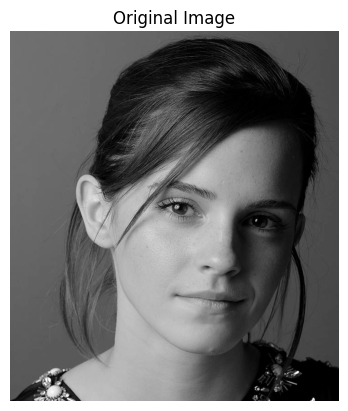

In [3]:
# Load the image in grayscale
image_path = 'a1images/emma.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [4]:
t1 = np.linspace(0, 50, 50).astype('uint8')
print(len(t1))
t2 = np.linspace(100, 255, 100).astype('uint8')
print(len(t2))
t3 = np.linspace(150, 256, 106).astype('uint8')

lookup_table = np.concatenate([t1, t2, t3])

50
100


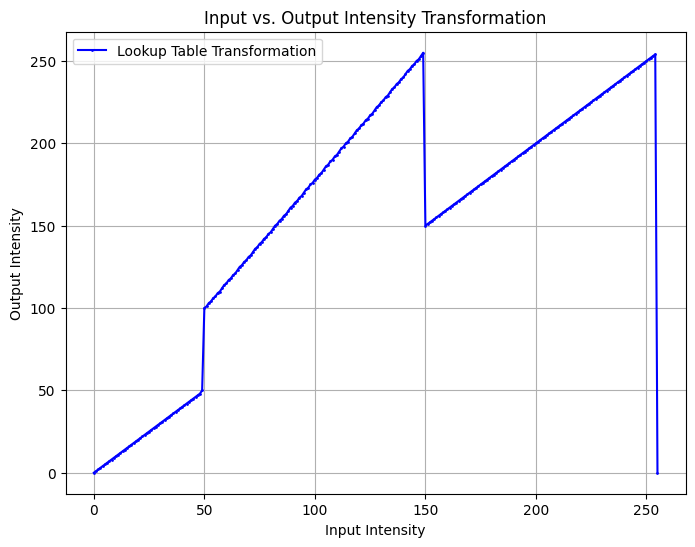

In [5]:
# Create an array representing the input intensities
input_values = np.arange(lookup_table.size)

# Plot the input and the corresponding output (transformed) intensities
plt.figure(figsize=(8, 6))
plt.plot(input_values, lookup_table, label='Lookup Table Transformation', color='blue', marker='o', markersize=1)

# Labeling the plot
plt.title('Input vs. Output Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [6]:
# Apply the transformation using the lookup table
transformed_image = cv2.LUT(image, lookup_table)

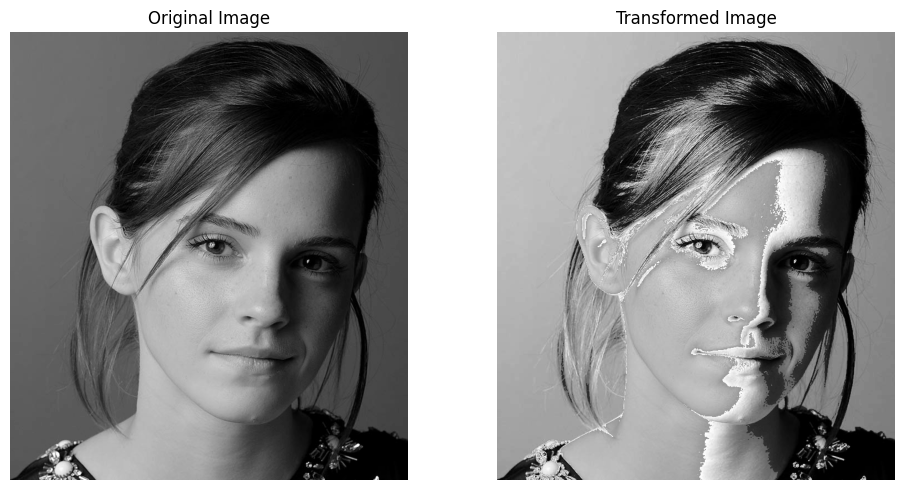

In [7]:
# Display the original and transformed images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## 2. Accentuate white and grey matter

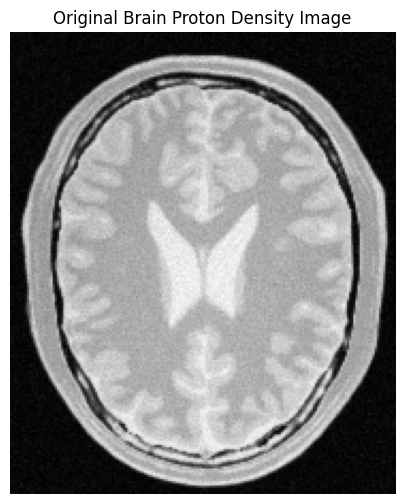

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
image_path = 'a1images/brain_proton_density_slice.png'
image_brain = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image_brain, cmap='gray')
plt.title("Original Brain Proton Density Image")
plt.axis('off')
plt.show()

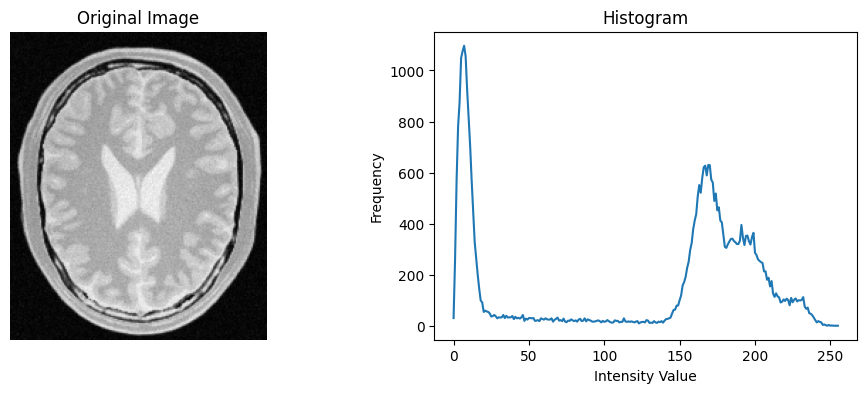

In [9]:
hist, bins = np.histogram(image_brain.ravel(), 256, [0, 256])
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].imshow(image_brain, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].plot(hist)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

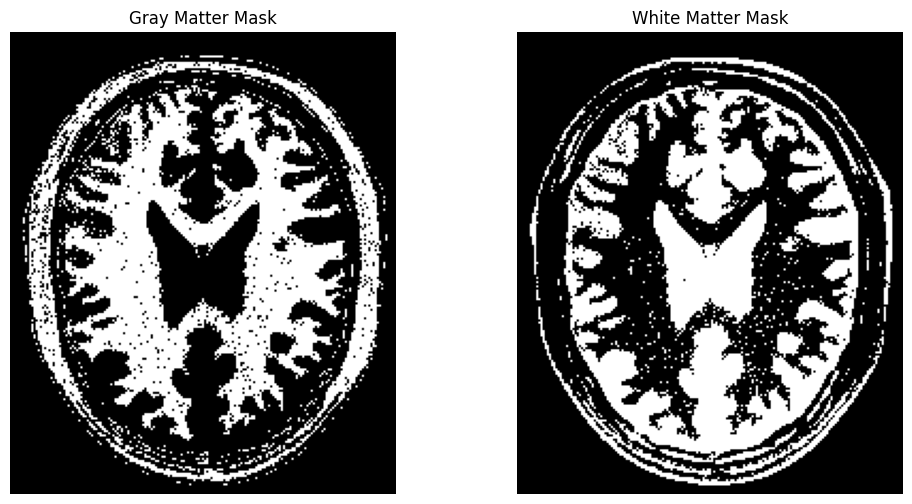

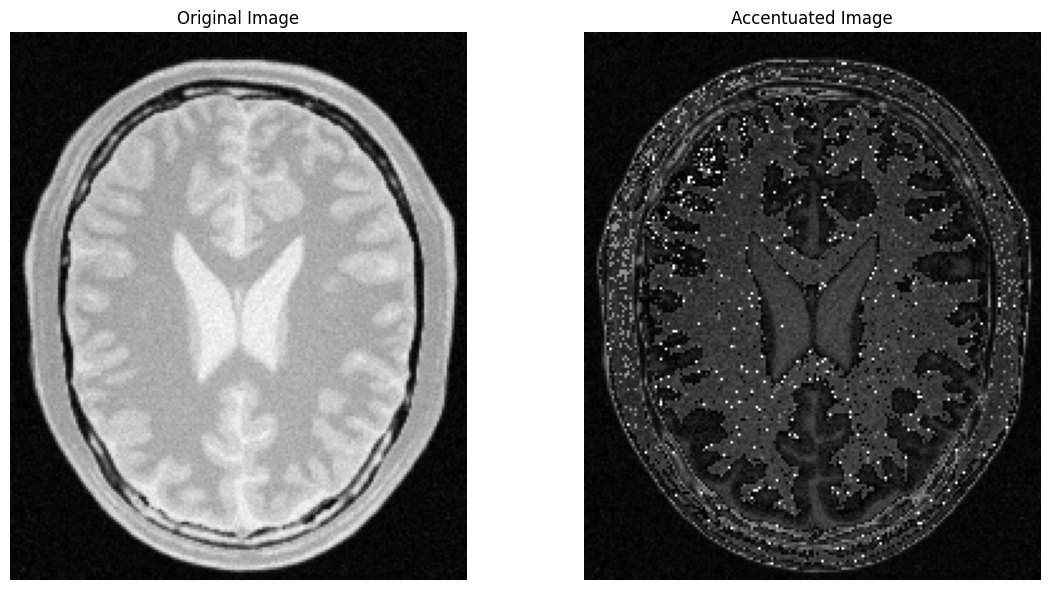

In [10]:
def accentuate_matter(image):
    # Cretae a copy of image
    image_accentuated = np.copy(image)

    #Apply transformation for gray matter 150 to 180
    gray_matter_mask = (image >= 150) & (image <= 180)
    image_accentuated[gray_matter_mask] = 1.7 * image_accentuated[gray_matter_mask] + 30

    # Apply transformation for white matter 100 to 250
    white_matter_mask = (image >= 180) & (image <= 250)
    image_accentuated[white_matter_mask] = 1.3 * image_accentuated[white_matter_mask] + 20

    return image_accentuated, gray_matter_mask, white_matter_mask

# Apply the accentuation transformation
image_accentuated, gray_matter_mask, white_matter_mask = accentuate_matter(image_brain)

# Display the masks
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray_matter_mask, cmap='gray')
plt.title("Gray Matter Mask")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(white_matter_mask, cmap='gray')
plt.title("White Matter Mask")
plt.axis('off')

# Display the original and transformed images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_brain, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_accentuated, cmap='gray')
plt.title("Accentuated Image")
plt.axis('off')

plt.tight_layout()
plt.show()


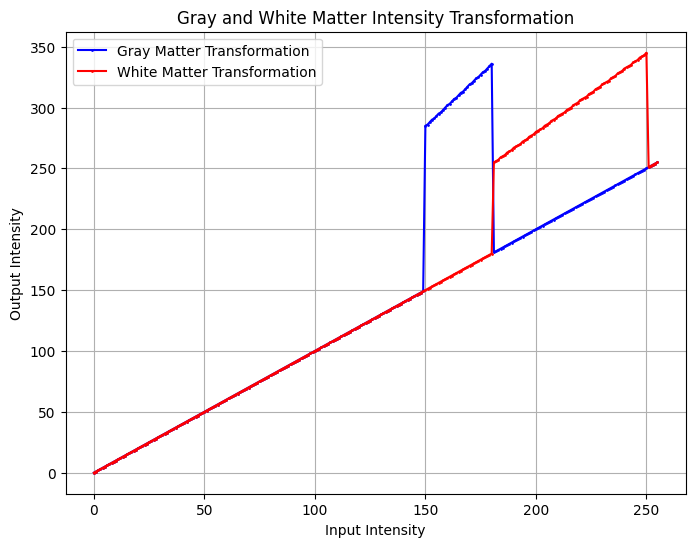

In [11]:
# plot intensity transformation of white and gray matter on same plot
input_values = np.arange(256)
output_values_gray = np.copy(input_values)
output_values_gray[150:181] = 1.7 * output_values_gray[150:181] + 30

output_values_white = np.copy(input_values)
output_values_white[181:251] = 1.3 * output_values_white[181:251] + 20

plt.figure(figsize=(8, 6))
plt.plot(input_values, output_values_gray, label='Gray Matter Transformation', color='blue', marker='o', markersize=1)
plt.plot(input_values, output_values_white, label='White Matter Transformation', color='red', marker='o', markersize=1)

plt.title('Gray and White Matter Intensity Transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.legend()
plt.show()

## Gamma correction

### Apply gamma correction with gamma = 0.7

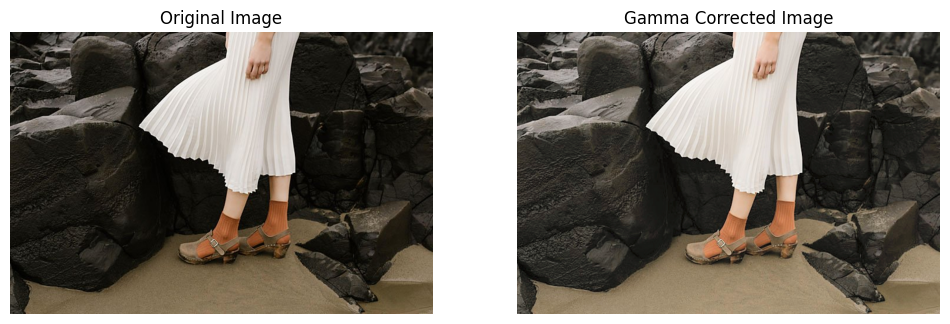

In [12]:
# Load the image
image_path = 'a1images\highlights_and_shadows.jpg'
image = cv2.imread(image_path)

# Convert the image from BGR to Lab color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Split the Lab image into L, a, b channels
L, a, b = cv2.split(lab_image)

# Apply gamma correction to the L channel
gamma = 0.7
L_corrected = np.array(255 * (L / 255) ** gamma, dtype='uint8')

# Merge the corrected L channel back with a and b
lab_corrected = cv2.merge([L_corrected, a, b])

# Convert the Lab image back to BGR color space
image_corrected = cv2.cvtColor(lab_corrected, cv2.COLOR_Lab2BGR)

# Display the original and corrected images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_corrected, cv2.COLOR_BGR2RGB))
plt.title('Gamma Corrected Image')
plt.axis('off')

plt.show()


### Histrogram visaulization

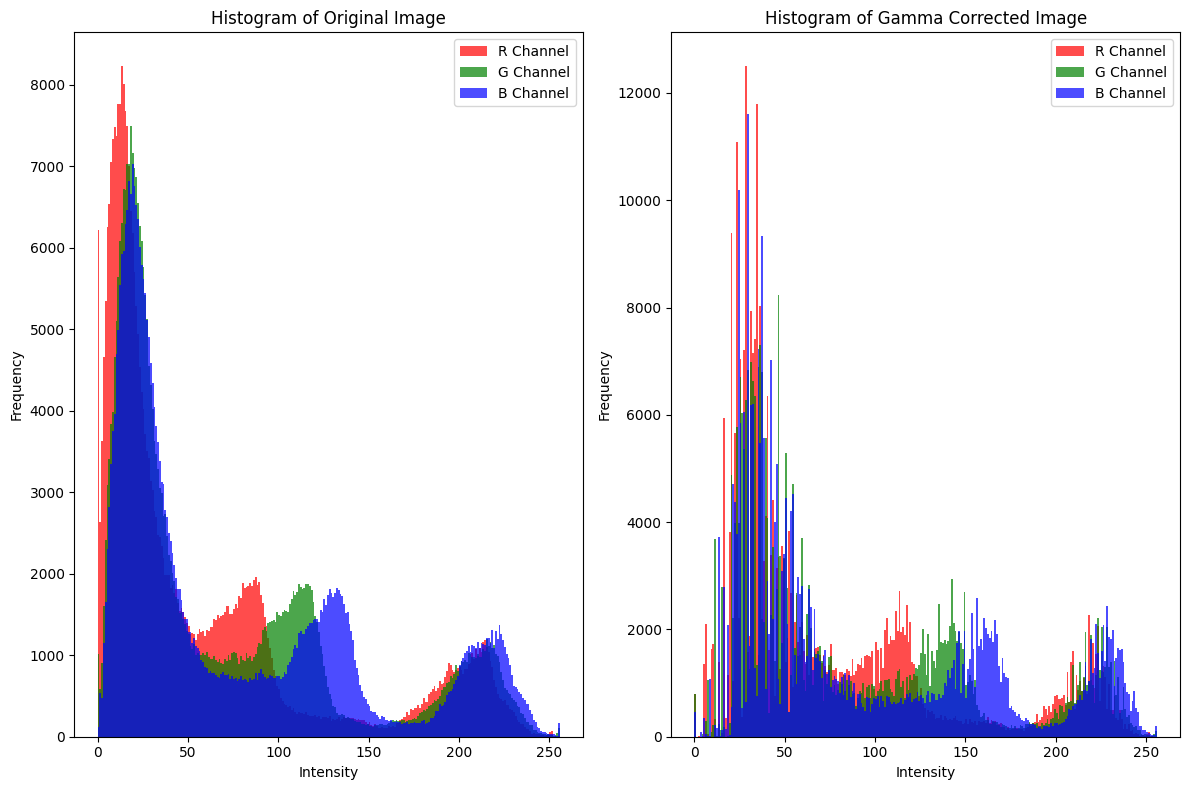

In [13]:
# Define colors and channel IDs
colors = ('r', 'g', 'b')
channel_ids = (0, 1, 2)

# Create a figure for the histograms
plt.figure(figsize=(12, 8))

# Histogram for the original image
plt.subplot(1, 2, 1)
for i, color in zip(channel_ids, colors):
    plt.hist(image[:, :, i].ravel(), bins=256, range=(0, 256), color=color, alpha=0.7, label=f'{color.upper()} Channel')
plt.title('Histogram of Original Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend()

# Histogram for the corrected image
plt.subplot(1, 2, 2)
for i, color in zip(channel_ids, colors):
    plt.hist(image_corrected[:, :, i].ravel(), bins=256, range=(0, 256), color=color, alpha=0.7, label=f'{color.upper()} Channel')
plt.title('Histogram of Gamma Corrected Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## 4. Vibrance analysis

### Load image

In [14]:
# Load the image
image_path = 'a1images\spider.png'

spider_image = cv2.imread(image_path)
# Convert the image from BGR to RGB color space
spider_image_RGB = cv2.cvtColor(spider_image, cv2.COLOR_BGR2RGB)

### Split the image into hue, saturation and value planes

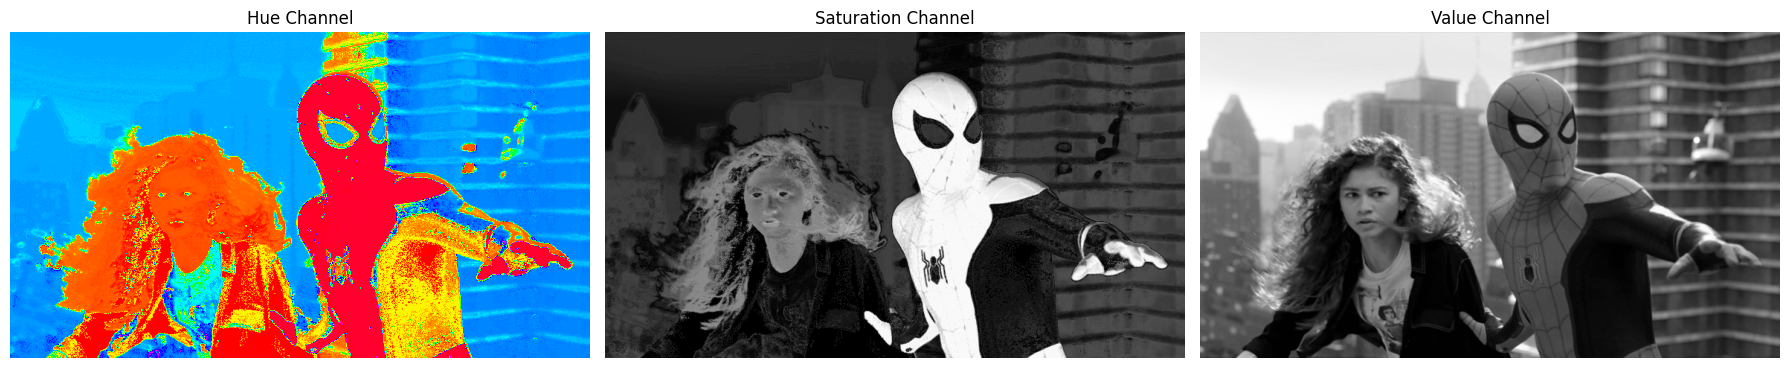

In [15]:
# Convert the spider image from BGR to HSV color space
hsv_image = cv2.cvtColor(spider_image, cv2.COLOR_BGR2HSV)

# Split the HSV image into H, S, and V channels
hue, saturation, value = cv2.split(hsv_image)

# Display the H, S, and V channels
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(hue, cmap='hsv')
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(value, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

### Apply intensity transformation to saturation plane and test for different a values

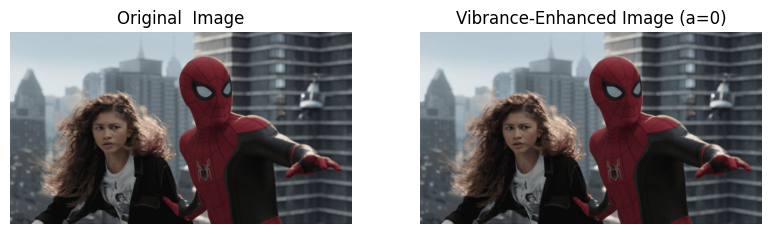

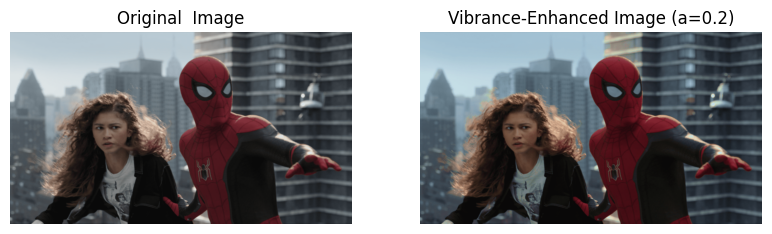

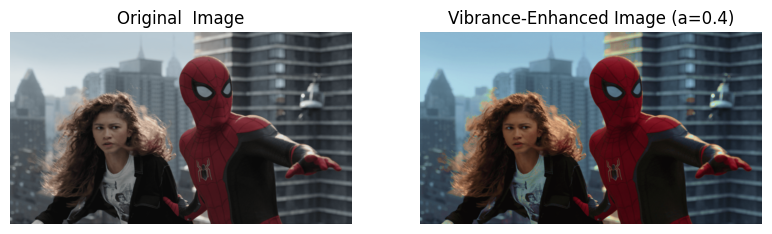

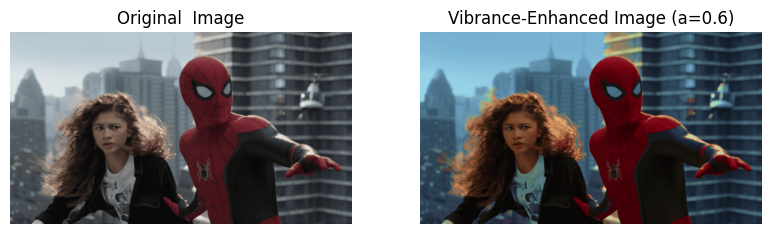

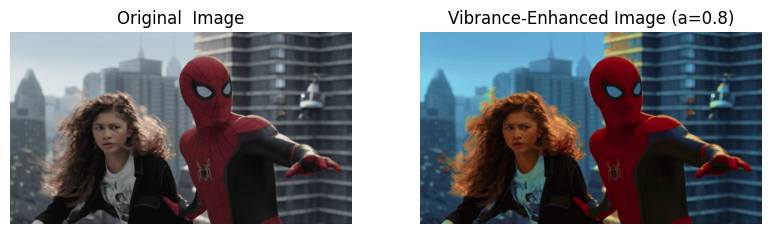

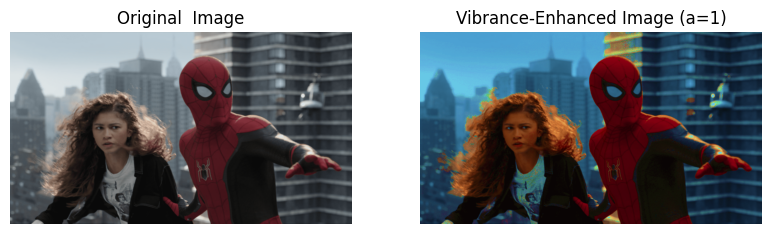

In [16]:
# Apply intensity transformation to the saturation channel
sigma = 70
for a in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    # Apply the transformation
    saturation_vibrant = np.clip(saturation + a * 128 * np.exp(-((saturation - 128) ** 2) / (2 * sigma ** 2)), 0, 255).astype(np.uint8)
    # Merge the channels back
    vibrant_hsv = cv2.merge((hue, saturation_vibrant, value))
    # Convert the HSV image back to RGB color space
    vibrant_image = cv2.cvtColor(vibrant_hsv, cv2.COLOR_HSV2RGB)

    # Display results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Original  Image')
    plt.imshow(spider_image_RGB)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title(f'Vibrance-Enhanced Image (a={a})')
    plt.imshow(vibrant_image)
    plt.axis('off')

    plt.show()


### Final Output (selected a = 0.45)

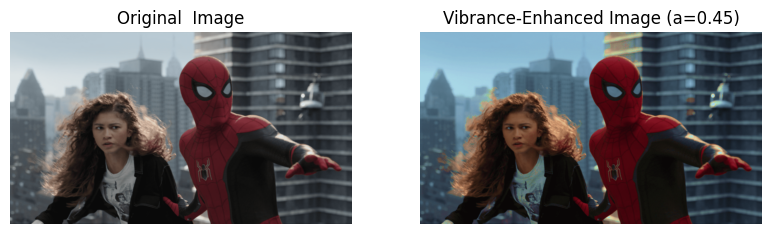

In [17]:
sigma = 70
a = 0.45

# Apply the transformation
saturation_vibrant = np.clip(saturation + a * 128 * np.exp(-((saturation - 128) ** 2) / (2 * sigma ** 2)), 0, 255).astype(np.uint8)
# Merge the channels back
vibrant_hsv = cv2.merge((hue, saturation_vibrant, value))
# Convert the HSV image back to RGB color space
vibrant_image = cv2.cvtColor(vibrant_hsv, cv2.COLOR_HSV2RGB)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original  Image')
plt.imshow(spider_image_RGB)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f'Vibrance-Enhanced Image (a={a})')
plt.imshow(vibrant_image)
plt.axis('off')

plt.show()

### Intensity transformation

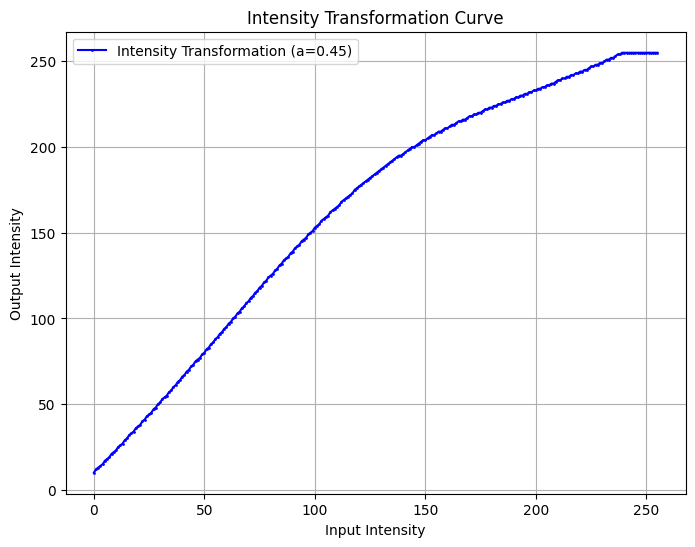

In [18]:
# Define the intensity transformation function
def intensity_transformation(saturation, a, sigma):
    return np.clip(saturation + a * 128 * np.exp(-((saturation - 128) ** 2) / (2 * sigma ** 2)), 0, 255).astype(np.uint8)

# Generate input and output values for the transformation
input_values = np.arange(256)
output_values = intensity_transformation(input_values, a, sigma)

# Plot the intensity transformation curve
plt.figure(figsize=(8, 6))
plt.plot(input_values, output_values, label=f'Intensity Transformation (a={a})', color='blue', marker='o', markersize=1)

plt.title('Intensity Transformation Curve')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.legend()
plt.show()

## 5. Histogram equalization

In [19]:
def histogram_equalization(image_path):
    # Load the image in grayscale
    f = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    M, N = f.shape
    L = 256
    
    # Calculate histogram and cumulative distribution function (CDF)
    hist, bins = np.histogram(f.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_min = cdf.min()
    cdf_max = cdf.max()
    
    # Create the lookup table
    t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)
    
    # Apply the transformation
    g = t[f]
    
    # Plot the original and equalized images along with their histograms
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    
    # Original image
    ax[0, 0].imshow(f, cmap='gray', vmin=0, vmax=255)
    ax[0, 0].set_title('Original Image')
    ax[0, 0].axis('off')
    
    # Histogram of original image
    ax[0, 1].plot(hist)
    ax[0, 1].set_title('Histogram of Original Image')
    ax[0, 1].set_xlabel('Intensity Value')
    ax[0, 1].set_ylabel('Frequency')
    
    # Equalized image
    ax[1, 0].imshow(g, cmap='gray', vmin=0, vmax=255)
    ax[1, 0].set_title('Histogram Equalization')
    ax[1, 0].axis('off')
    
    # Histogram of equalized image
    hist_eq, bins_eq = np.histogram(g.ravel(), 256, [0, 256])
    ax[1, 1].plot(hist_eq)
    ax[1, 1].set_title('Histogram of Equalized Image')
    ax[1, 1].set_xlabel('Intensity Value')
    ax[1, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [20]:
# Apply histogram equalization to the image
histogram_equalization('a1images/shells.tif')

NameError: name 'cv' is not defined

## 6. Apply histogram equalization to the foreground of an image

### Load image

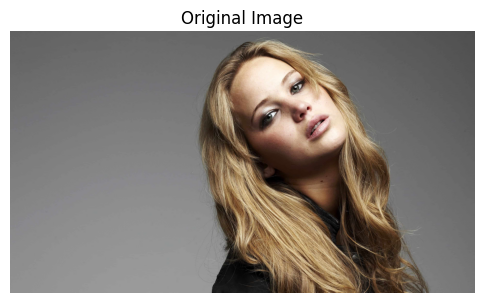

In [117]:
# Load the image
image_jeniffer = cv2.imread('a1images\jeniffer.jpg')
image_jeniffer_rgb = cv2.cvtColor(image_jeniffer, cv2.COLOR_BGR2RGB)

# plot the image
plt.figure(figsize=(6, 6))
plt.imshow(image_jeniffer_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

### Split the image into hue, saturation and value planes

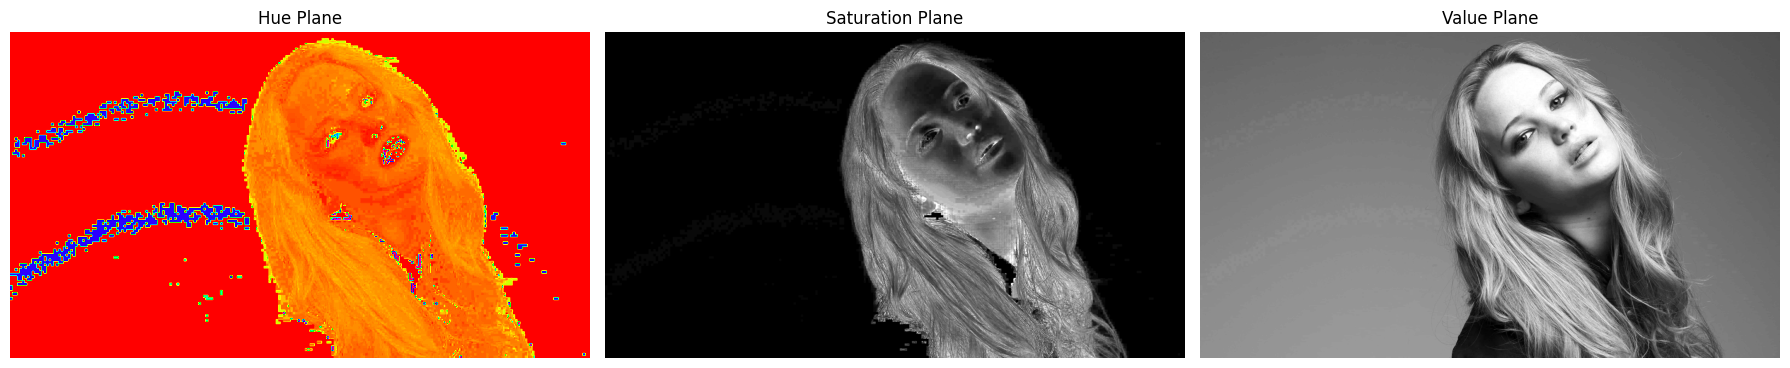

In [118]:
# Convert the image from BGR to HSV color space
hsv_image = cv2.cvtColor(image_jeniffer, cv2.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value planes
hue, saturation, value = cv2.split(hsv_image)

# Display the H, S, and V channels
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(hue, cmap='hsv')
plt.title('Hue Plane')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Plane')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(value, cmap='gray')
plt.title('Value Plane')
plt.axis('off')

plt.tight_layout()
plt.show()

### Threshold the value plane to extract the foreground mask

In [139]:

# # Using Otsu's thresholding to automatically find the optimal threshold
# _, mask = cv2.threshold(value, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# # Display the mask
# plt.figure()
# plt.title('Foreground Mask (Otsu\'s Thresholding)')
# plt.imshow(mask, cmap='gray')
# plt.axis('off')
# plt.show()


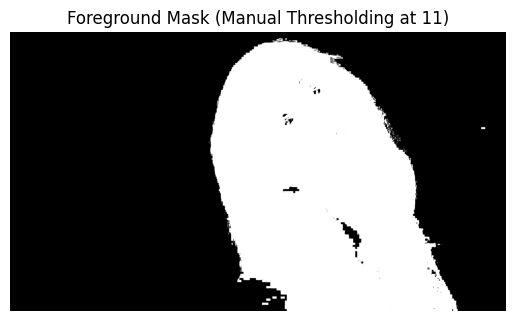

In [159]:
# (b) Manual thresholding
# choose a manual threshold value
manual_threshold = 11
_, mask = cv2.threshold(saturation, manual_threshold, 255, cv2.THRESH_BINARY)

# Display the mask
plt.figure()
plt.title(f'Foreground Mask (Manual Thresholding at {manual_threshold})')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

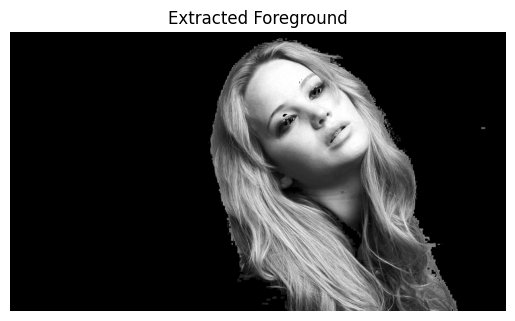

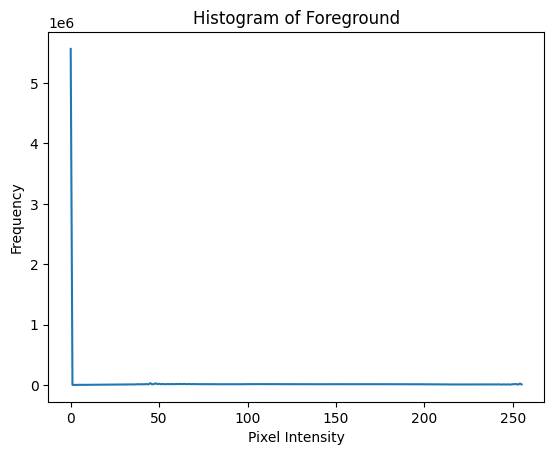

In [160]:
# Extract the foreground using the mask
foreground = cv2.bitwise_and(value, value, mask=mask)

# Display the extracted foreground
plt.figure()
plt.title('Extracted Foreground')
plt.imshow(foreground, cmap='gray')
plt.axis('off')
plt.show()

# Compute the histogram of the foreground
hist_fg, bins = np.histogram(foreground.flatten(), 256, [0, 256])

# Display the histogram
plt.figure()
plt.title('Histogram of Foreground')
plt.plot(hist_fg)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

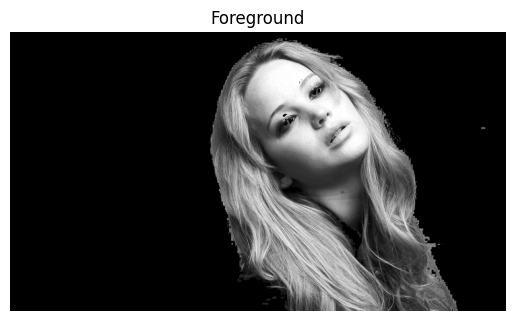

In [161]:
# convert foreground image to RGB
foreground_rgb = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)

# Display the foreground and its histogram
plt.figure()
plt.title('Foreground')
plt.imshow(foreground, cmap='gray')
plt.axis('off')
plt.show()

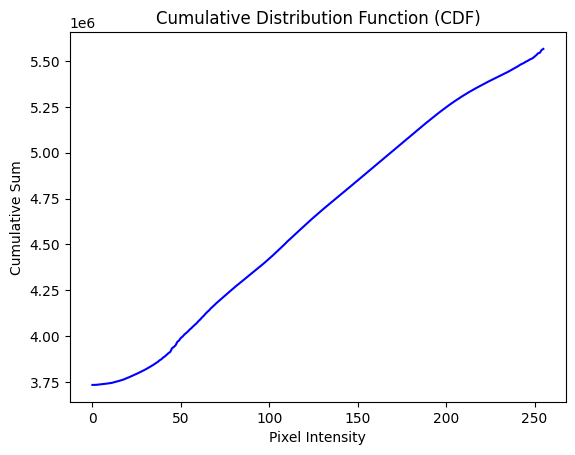

In [162]:
# Compute the cumulative sum (CDF) of the histogram
cdf_fg = np.cumsum(hist_fg)

# Normalize the CDF to match the pixel value range [0, 255]
cdf_normalized = cdf_fg * hist_fg.max() / cdf_fg.max()

# Display the CDF
plt.figure()
plt.title('Cumulative Distribution Function (CDF)')
plt.plot(cdf_normalized, color='blue')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Sum')
plt.show()

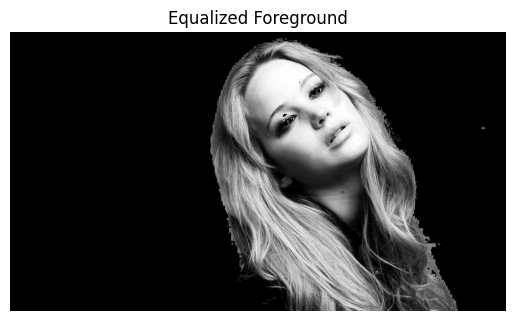

In [163]:
# Perform histogram equalization using the CDF

# Mask the zeros in CDF (if any), normalize and scale the CDF
cdf_m = np.ma.masked_equal(cdf_fg, 0)  # Mask the zeros (if any)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalize
cdf_fg_normalized = np.ma.filled(cdf_m, 0).astype('uint8')  # Fill masked values with 0 and convert to uint8

# Apply the normalized CDF to equalize the pixel values in the foreground
foreground_equalized = cdf_fg_normalized[foreground]

# Display the equalized foreground
plt.figure()
plt.title('Equalized Foreground')
plt.imshow(foreground_equalized, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

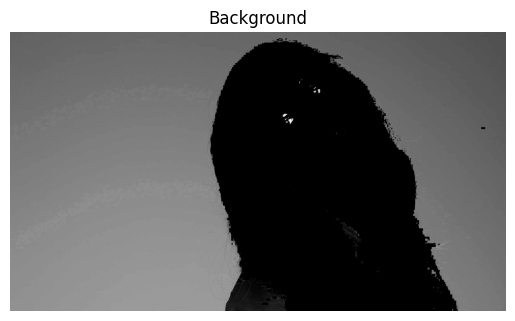

In [164]:
# (f) Extract the background using the inverse of the mask
background_mask = cv2.bitwise_not(mask)

# Extract the background using the mask on the value plane
background = cv2.bitwise_and(value, value, mask=background_mask)

# plot background
plt.figure()
plt.title('Background')
plt.imshow(background, cmap='gray')
plt.axis('off')
plt.show()

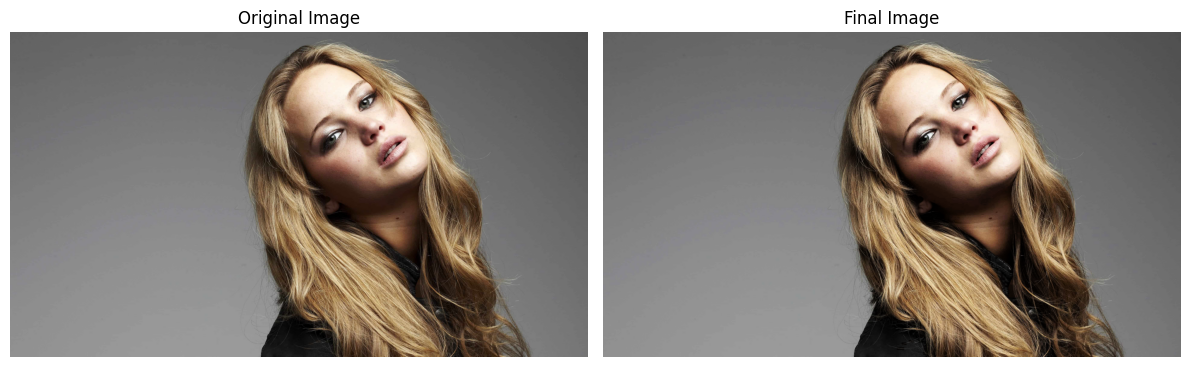

In [165]:
# Combine the background and the equalized foreground
combined_value = cv2.add(foreground_equalized, background)

# Recombine the hue, saturation, and the new combined value planes
final_hsv_image = cv2.merge((hue, saturation, combined_value))

# Convert the final HSV image back to RGB
final_image = cv2.cvtColor(final_hsv_image, cv2.COLOR_HSV2RGB)

# plot original and final image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_jeniffer_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_image)
plt.title('Final Image')
plt.axis('off')

plt.tight_layout()
plt.show()